In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import sklearn
import sklearn.ensemble as ek
np.random.seed(42)
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve,  cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
print(sklearn.__version__)


1.6.1


#Load the filtered dataset

In [28]:
dataset = pd.read_csv('filtered_dataset.csv')

In [29]:
dataset.head()

,MajorLinkerVersion,MinorOperatingSystemVersion,MajorSubsystemVersion,SizeOfStackReserve,TimeDateStamp,MajorOperatingSystemVersion,Characteristics,ImageBase,Subsystem,MinorImageVersion,...,ImageDirectoryEntryExport,CheckSum,DirectoryEntryImportSize,SectionMaxChar,MajorImageVersion,AddressOfEntryPoint,SectionMinEntropy,SizeOfHeaders,SectionMinVirtualsize,Malware
0,8,0,5,524288,1236512358,6,34,4294967296,2,0,...,0,295281,152,3758096608,6,51316,0.000000,1024,274,1
1,9,0,5,1048576,1365109591,5,258,4194304,2,0,...,0,0,311,3791650880,0,84654,3.815281,1024,24124,1
2,6,0,4,1048576,1438777028,4,14,4194304,2,0,...,0,0,176,3221225536,0,27364,0.103538,4096,329,1
3,2,0,4,2097152,1354629311,4,783,4194304,2,0,...,0,14174816,155,3224371328,6,16685,0.000000,1024,144,1
4,2,0,4,2097152,1386631250,4,783,4194304,2,0,...,0,0,43,3227516992,1,4416,0.000000,1024,24,1


In [30]:
# Separate X and y

X  = dataset.drop(['Malware'], axis=1)
y = dataset['Malware']

In [31]:
X.shape

(19611, 23)

In [32]:
# Spliting the dataset into Trainign Set and Test set at 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
X_train.shape

(15688, 23)

In [34]:
X_test.shape

(3923, 23)

In [35]:
# Empty lists to store the model performance results

ML_Model = []
Accuracy = []
F1_score = []
Recall = []
Precision = []


def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  Accuracy.append(round(a, 3))
  F1_score.append(round(b, 3))
  Recall.append(round(c, 3))
  Precision.append(round(d, 3))

#Model 1: Support Vector Classifier

In [36]:
from sklearn.svm import SVC

# Call the SVC model
svc = SVC(kernel="linear", C=1, max_iter=10000, random_state=42)

# Train the model with the train data
svc.fit(X_train, y_train)


# Ask the model to make predictions using test data
svc_prediction = svc.predict(X_test)


# Calculate the accuracy value of the DT model
svc_accuracy = accuracy_score(y_test,  svc_prediction )*100

print(svc_accuracy)

25.33775172062197


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


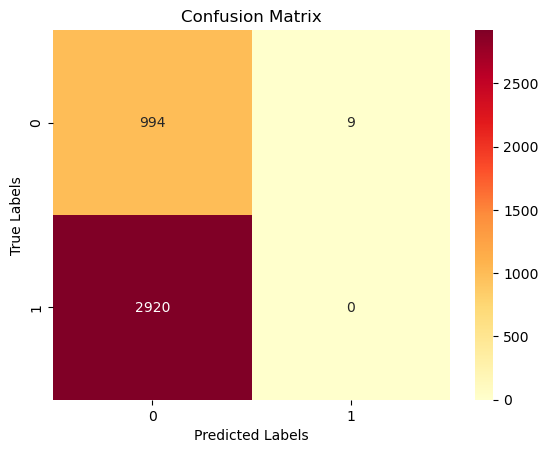

In [25]:
# Generate the confusion matrix for the test result

confMatrix = confusion_matrix(y_true=y_test, y_pred=svc_prediction )

labels = np.unique(np.concatenate((y_test, svc_prediction)))


sns.heatmap(confMatrix, annot=True, fmt="d", cmap="YlOrRd",
            xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [37]:
# Evaluation metrics


svc_Accuracy = accuracy_score(y_true = y_test, y_pred = svc_prediction)*100
svc_Precision = precision_score(y_true = y_test, y_pred = svc_prediction)*100
svc_Recall = recall_score(y_true = y_test, y_pred = svc_prediction)*100
svc_F1_score = f1_score(y_true = y_test, y_pred = svc_prediction)*100


print('Accuracy: ', svc_Accuracy)
print('Precision: ', svc_Precision)
print('Recall: ', svc_Recall)
print('F1 score: ', svc_F1_score)

Accuracy:  25.33775172062197
Precision:  0.0
Recall:  0.0
F1 score:  0.0


In [38]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Classifier',svc_Accuracy,svc_F1_score,
             svc_Recall ,svc_Precision)

In [58]:
# Save the trained model to a file


joblib.dump(svc, 'svc.pkl')

['svc.pkl']

#Model 2: Decision Tree Classifier

In [40]:
# Call the Decision Tree model with max depth = 10

dtree = DecisionTreeClassifier(max_depth=10)

# Train the model with the train data

dtree.fit(X_train, y_train)

# Ask the model to make predictions using test data

dtree_prediction = dtree.predict(X_test)

# Calculate the accuracy value of the DT model

dtree_accuracy = accuracy_score(y_test,  dtree_prediction)*100

print(dtree_accuracy)

98.87840938057609


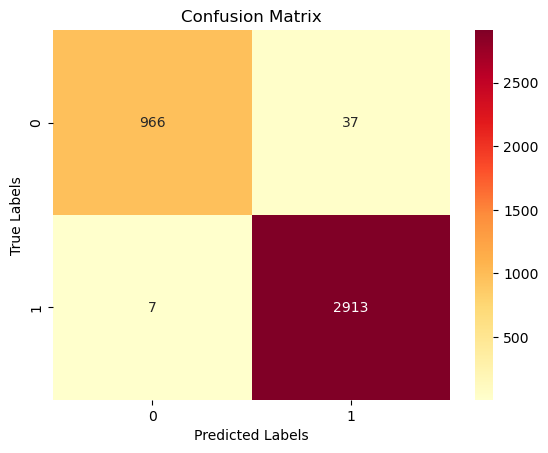

In [92]:
# Generate the confusion matrix for the test result

confMatrix = confusion_matrix(y_true=y_test, y_pred=dtree_prediction)

labels = np.unique(np.concatenate((y_test, dtree_prediction)))


sns.heatmap(confMatrix, annot=True, fmt="d", cmap="YlOrRd",
            xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [42]:
# Evaluation metrics


dtree_Accuracy = accuracy_score(y_true = y_test, y_pred = dtree_prediction)*100
dtree_Precision = precision_score(y_true = y_test, y_pred = dtree_prediction)*100
dtree_Recall = recall_score(y_true = y_test, y_pred = dtree_prediction)*100
dtree_F1_score = f1_score(y_true = y_test, y_pred = dtree_prediction)*100


print('Accuracy: ', dtree_Accuracy)
print('Precision: ', dtree_Precision)
print('Recall: ', dtree_Recall)
print('F1 score: ', dtree_F1_score)

Accuracy:  98.87840938057609
Precision:  98.7457627118644
Recall:  99.76027397260275
F1 score:  99.2504258943782


In [59]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree Classifier',dtree_Accuracy,dtree_F1_score,
             dtree_Recall ,dtree_Precision)

In [60]:
# Save the trained model to a file


joblib.dump(dtree, 'decision_tree.pkl')

['decision_tree.pkl']

#Model 3: K-Nearest Neighbor Classifier

In [43]:
# Call the KNN model with k value = 1

knn = KNeighborsClassifier(n_neighbors=1)


# Train the model with the train data
knn.fit(X_train, y_train)


# Ask the model to make predictions using test data
knn_prediction = knn.predict(X_test)
# Calculate the accuracy value of the KNN model

knn_accuracy = accuracy_score(y_test, knn_prediction)*100

print(knn_accuracy)

98.31761407086414


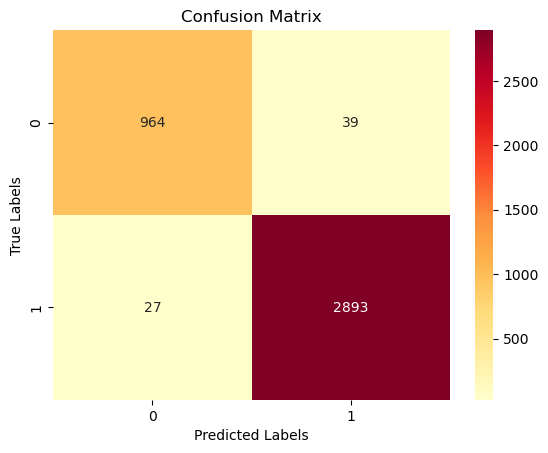

In [44]:
# Generate the confusion matrix


confMatrix = confusion_matrix(y_true=y_test, y_pred=knn_prediction)

labels = np.unique(np.concatenate((y_test, knn_prediction)))


sns.heatmap(confMatrix, annot=True, fmt="d", cmap="YlOrRd",
            xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [45]:
# Evaluation metrics


knn_Accuracy = accuracy_score(y_true = y_test, y_pred = knn_prediction)*100
knn_Precision = precision_score(y_true = y_test, y_pred = knn_prediction)*100
knn_Recall = recall_score(y_true = y_test, y_pred = knn_prediction)*100
knn_F1_score = f1_score(y_true = y_test, y_pred = knn_prediction)*100


print('Accuracy: ', knn_Accuracy)
print('Precision: ', knn_Precision)
print('Recall: ', knn_Recall)
print('F1 score: ', knn_F1_score)

Accuracy:  98.31761407086414
Precision:  98.66984993178718
Recall:  99.07534246575342
F1 score:  98.87218045112782


In [62]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('KNN',knn_Accuracy,knn_F1_score,
             knn_Recall ,knn_Precision)

In [63]:
# Save the trained model to a file


joblib.dump(knn, 'knn.pkl')

['knn.pkl']

#Model 4: Random Forest Classifier

In [46]:
# Call the model with number of trees = 100

forest =  RandomForestClassifier(n_estimators = 100)

# Train the model with the train data

forest.fit(X_train, y_train)

# Ask the model to make predictions using test data

forest_prediction = forest.predict(X_test)

# Calculate the accuracy value of the DT model
forest_accuracy = accuracy_score(y_test,  forest_prediction)*100

print(forest_accuracy)

99.23527912312005


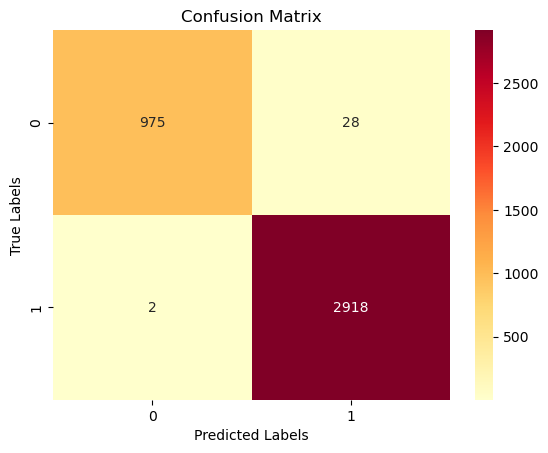

In [47]:
# Generate the confusion matrix for the test result


confMatrix = confusion_matrix(y_true=y_test, y_pred=forest_prediction)

labels = np.unique(np.concatenate((y_test, forest_prediction)))


sns.heatmap(confMatrix, annot=True, fmt="d", cmap="YlOrRd",
            xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [48]:
# Evaluation metrics


forest_Accuracy = accuracy_score(y_true = y_test, y_pred = forest_prediction)*100
forest_Precision = precision_score(y_true = y_test, y_pred = forest_prediction)*100
forest_Recall = recall_score(y_true = y_test, y_pred = forest_prediction)*100
forest_F1_score = f1_score(y_true = y_test, y_pred = forest_prediction)*100


print('Accuracy: ', forest_Accuracy)
print('Precision: ', forest_Precision)
print('Recall: ', forest_Recall)
print('F1 score: ', forest_F1_score)

Accuracy:  99.23527912312005
Precision:  99.04955872369314
Recall:  99.93150684931507
F1 score:  99.48857824752812


In [64]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',forest_Accuracy,forest_F1_score,
             forest_Recall ,forest_Precision)

In [65]:
# Save the trained model to a file


joblib.dump(forest, 'forest.pkl')

['forest.pkl']

#Model 5: XGBoost Classifier

In [66]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Call the model
xgb = XGBClassifier()

# Train the model with the train data
xgb.fit(X_train, y_train_enc)

# Ask the model to make predictions using test data
xgb_prediction_enc = xgb.predict(X_test)

# Convert predictions back to original labels if needed
xgb_prediction = le.inverse_transform(xgb_prediction_enc)

# Calculate the accuracy value of the model
XGB_accuracy = accuracy_score(y_test, xgb_prediction) * 100
print(XGB_accuracy)

99.28626051491206


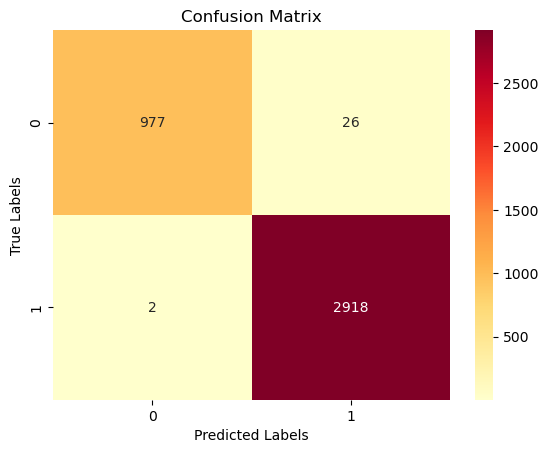

In [54]:
# Generate the confusion matrix


confMatrix = confusion_matrix(y_true=y_test, y_pred=xgb_prediction)

labels = np.unique(np.concatenate((y_test, xgb_prediction)))


sns.heatmap(confMatrix, annot=True, fmt="d", cmap="YlOrRd",
            xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [55]:
# Evaluation metrics


xgb_Accuracy = accuracy_score(y_true = y_test, y_pred = xgb_prediction)*100
xgb_Precision = precision_score(y_true = y_test, y_pred = xgb_prediction)*100
xgb_Recall = recall_score(y_true = y_test, y_pred = xgb_prediction)*100
xgb_F1_score = f1_score(y_true = y_test, y_pred = xgb_prediction)*100


print('Accuracy: ', xgb_Accuracy)
print('Precision: ', xgb_Precision)
print('Recall: ', xgb_Recall)
print('F1 score: ', xgb_F1_score)

Accuracy:  99.28626051491206
Precision:  99.11684782608695
Recall:  99.93150684931507
F1 score:  99.5225102319236


In [67]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('XGBoost',xgb_Accuracy,xgb_F1_score,
             xgb_Recall ,xgb_Precision)

In [68]:
# Save the trained model to a file


joblib.dump(xgb, 'xgb.pkl')

['xgb.pkl']

#Now compare the models

In [69]:
#creating dataframe using the recorded stats


result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : Accuracy,
                        'f1_score' : F1_score,
                        'Recall'   : Recall,
                        'Precision': Precision,
                      })

In [70]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Support Vector Classifier,25.338,0.000,0.000,0.000
1,Decision Tree Classifier,98.878,99.250,99.760,98.746
2,KNN,98.318,98.872,99.075,98.670
3,Random Forest,99.235,99.489,99.932,99.050
4,XGBoost,99.286,99.523,99.932,99.117


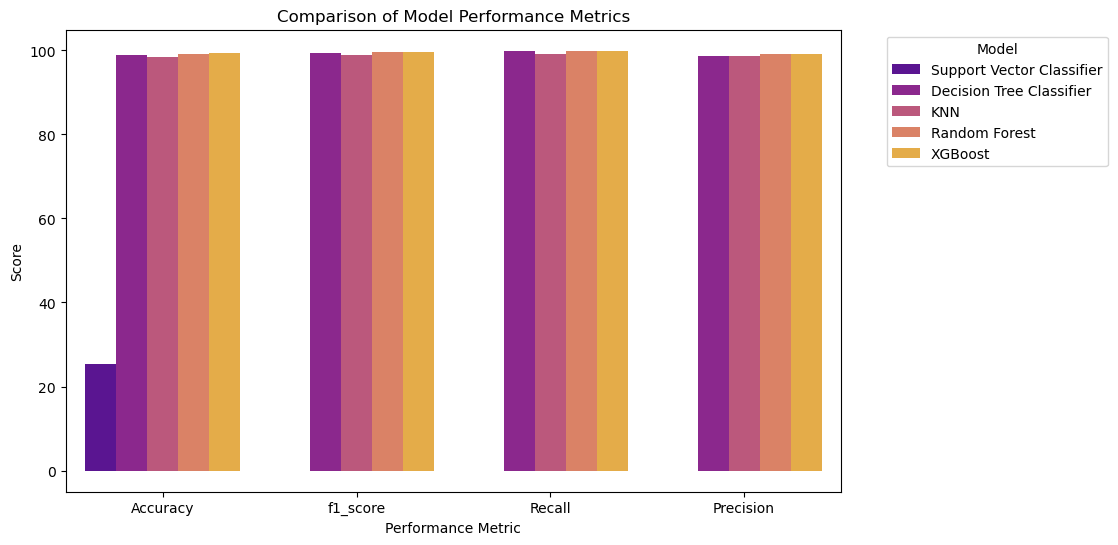

In [71]:
# Now plot the graphs for comparison

df_melted = result.melt(id_vars='ML Model', var_name='Metric', value_name='Score')

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='ML Model', data=df_melted, palette='plasma')

# Labels and title
plt.xlabel('Performance Metric')
plt.ylabel('Score')
plt.title('Comparison of Model Performance Metrics')
plt.ylim(result.iloc[:, 1:].min().min() - 5, result.iloc[:, 1:].max().max() + 5)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position

# Show plot
plt.show()

In [72]:
#Test the best model

In [73]:
!pip install pefile

In [74]:
import pefile
import pandas as pd
import math

In [75]:
# Load our trained model


import joblib

# Load the trained model
model = joblib.load('forest.pkl')

In [76]:
# Code to ectract the 23 features from the uploaded test file



def calculate_entropy(data):   # calculate teh Shannon entropy of a byte data
    if not data:
        return 0
    entropy = 0
    for x in range(256):
        p_x = float(data.count(bytes([x]))) / len(data)
        if p_x > 0:
            entropy += - p_x * math.log(p_x, 2)
    return entropy

def extract_features(file_path):          # extracts the PE header features
    pe = pefile.PE(file_path)

    # Extract the specified 23 features in the given order
    features = {
        'MajorLinkerVersion': pe.OPTIONAL_HEADER.MajorLinkerVersion,
        'MinorOperatingSystemVersion': pe.OPTIONAL_HEADER.MinorOperatingSystemVersion,
        'MajorSubsystemVersion': pe.OPTIONAL_HEADER.MajorSubsystemVersion,
        'SizeOfStackReserve': pe.OPTIONAL_HEADER.SizeOfStackReserve,
        'TimeDateStamp': pe.FILE_HEADER.TimeDateStamp,
        'MajorOperatingSystemVersion': pe.OPTIONAL_HEADER.MajorOperatingSystemVersion,
        'Characteristics': pe.FILE_HEADER.Characteristics,
        'ImageBase': pe.OPTIONAL_HEADER.ImageBase,
        'Subsystem': pe.OPTIONAL_HEADER.Subsystem,
        'MinorImageVersion': pe.OPTIONAL_HEADER.MinorImageVersion,
        'MinorSubsystemVersion': pe.OPTIONAL_HEADER.MinorSubsystemVersion,
        'SizeOfInitializedData': pe.OPTIONAL_HEADER.SizeOfInitializedData,
        'DllCharacteristics': pe.OPTIONAL_HEADER.DllCharacteristics,
        'DirectoryEntryExport': 1 if hasattr(pe, 'DIRECTORY_ENTRY_EXPORT') else 0,
        'ImageDirectoryEntryExport': pe.OPTIONAL_HEADER.DATA_DIRECTORY[0].Size if hasattr(pe, 'DIRECTORY_ENTRY_EXPORT') else 0,
        'CheckSum': pe.OPTIONAL_HEADER.CheckSum,
        'DirectoryEntryImportSize': pe.OPTIONAL_HEADER.DATA_DIRECTORY[1].Size if hasattr(pe, 'DIRECTORY_ENTRY_IMPORT') else 0,
        'SectionMaxChar': len(pe.sections),  # Example calculation for demonstration
        'MajorImageVersion': pe.OPTIONAL_HEADER.MajorImageVersion,
        'AddressOfEntryPoint': pe.OPTIONAL_HEADER.AddressOfEntryPoint,
        'SectionMinEntropy': None,  # Placeholder, will be calculated
        'SizeOfHeaders': pe.OPTIONAL_HEADER.SizeOfHeaders,
        'SectionMinVirtualsize': None  # Placeholder, will be calculated
    }

    # Calculate SectionMinEntropy
    entropies = []
    for section in pe.sections:
        entropy = calculate_entropy(section.get_data())
        entropies.append(entropy)

    if entropies:
        features['SectionMinEntropy'] = min(entropies)

    # Calculate SectionMinVirtualsize (example calculation)
    features['SectionMinVirtualsize'] = min(section.Misc_VirtualSize for section in pe.sections)

    return pd.DataFrame([features])

In [97]:
# Read a test file and apply the feature extraction function

test_file = "notepad.exe"
features = extract_features(test_file)
features

,MajorLinkerVersion,MinorOperatingSystemVersion,MajorSubsystemVersion,SizeOfStackReserve,TimeDateStamp,MajorOperatingSystemVersion,Characteristics,ImageBase,Subsystem,MinorImageVersion,...,DirectoryEntryExport,ImageDirectoryEntryExport,CheckSum,DirectoryEntryImportSize,SectionMaxChar,MajorImageVersion,AddressOfEntryPoint,SectionMinEntropy,SizeOfHeaders,SectionMinVirtualsize
0,14,0,10,524288,2825337592,10,34,5368709120,2,0,...,0,0,415488,1020,7,10,6560,0.253915,4096,248


In [109]:
ls

 Volume in drive C is OS
 Volume Serial Number is 4A1F-734A

 Directory of C:\Users\DELL\anaconda_projects\69e919a4-894a-46d4-a8ed-f5b80383354a

22-08-2025  08:02    <DIR>          .
21-08-2025  20:55    <DIR>          ..
21-08-2025  23:18    <DIR>          .ipynb_checkpoints
22-08-2025  08:02           421,888 15118984482ef1bee0606b4ac461c8ed1cb6f66a2ed0de20bcd1eef898615ee1.exe
21-08-2025  23:22            18,799 app.ipynb.ipynb
21-08-2025  20:55         6,710,740 dataset_malwares.csv
21-08-2025  23:05            15,673 decision_tree.pkl
21-08-2025  22:16         2,255,192 filtered_dataset.csv
21-08-2025  23:07         4,312,217 forest.pkl
21-08-2025  23:07         3,013,764 knn.pkl
22-08-2025  06:59           212,863 MachineLearning.ipynb.ipynb
22-08-2025  05:17           360,448 notepad.exe
21-08-2025  23:04           106,779 svc.pkl
21-08-2025  23:21    <DIR>          uploads
21-08-2025  23:09           212,012 xgb.pkl
              11 File(s)     17,640,375 bytes
               4 

In [98]:
# Make prediction usiing the model

prediction = model.predict(features)     # Predict using your model


result = "Malware" if prediction[0] == 1 else "Safe"
result

'Safe'

In [113]:
# test another file

test_file = 'Ransomware.WannaCrypt0r.v1.exe'
features = extract_features(test_file)

prediction = model.predict(features)     # Predict using your model


result = "Malware" if prediction[0] == 1 else "Safe"
result

'Malware'